In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [6]:
counter = {}
category_classifier = {}
avg_nb_of_categories_per_article = 0
nb_articles = 0
for i in range(1,32):
    with open(f"processed_shards/shard_{i}.json") as f:
        hist = json.load(f)
        for k,v in hist.items():
            nb_articles += 1
            avg_nb_of_categories_per_article += len(hist[k])
            for cat in hist[k]:
                counter[cat] = 1 if counter.get(cat) is None else counter.get(cat) + 1
                if category_classifier.get(cat) is None:
                    category_classifier[cat] = []
                category_classifier[cat].append((k, i))
        print(f"Processed shard nb: {i}")

Processed shard nb: 1
Processed shard nb: 2
Processed shard nb: 3
Processed shard nb: 4
Processed shard nb: 5
Processed shard nb: 6
Processed shard nb: 7
Processed shard nb: 8
Processed shard nb: 9
Processed shard nb: 10
Processed shard nb: 11
Processed shard nb: 12
Processed shard nb: 13
Processed shard nb: 14
Processed shard nb: 15
Processed shard nb: 16
Processed shard nb: 17
Processed shard nb: 18
Processed shard nb: 19
Processed shard nb: 20
Processed shard nb: 21
Processed shard nb: 22
Processed shard nb: 23
Processed shard nb: 24
Processed shard nb: 25
Processed shard nb: 26
Processed shard nb: 27
Processed shard nb: 28
Processed shard nb: 29
Processed shard nb: 30
Processed shard nb: 31


In [8]:
print("nb articles:", nb_articles)
print("avg nb categories per article:", avg_nb_of_categories_per_article / nb_articles)

nb articles: 3000418
avg nb categories per article: 5.967277892613629


In [3]:
sorted_counter = dict(reversed(sorted(counter.items(), key=lambda item: item[1])))

In [4]:
sorted_counter

{'Category:Living people': 472784,
 'Category:Disambiguation pages': 98366,
 'Category:Human name disambiguation pages': 35754,
 'Category:Surnames': 32173,
 'Category:Place name disambiguation pages': 30210,
 "Category:Men's association football midfielders": 28328,
 "Category:Men's association football forwards": 21155,
 "Category:Men's association football defenders": 20956,
 'Category:IUCN Red List least concern species': 15837,
 'Category:English Football League players': 12985,
 "Category:English men's footballers": 10995,
 'Category:American black-and-white films': 10904,
 'Category:21st-century American women': 10701,
 'Category:1988 births': 8287,
 'Category:1990 births': 8172,
 'Category:1989 births': 8105,
 'Category:1987 births': 8076,
 'Category:1986 births': 8012,
 'Category:Given names': 7982,
 'Category:1985 births': 7972,
 'Category:1984 births': 7829,
 'Category:1992 births': 7804,
 "Category:Men's association football goalkeepers": 7764,
 'Category:1991 births': 7727

([<matplotlib.patches.Wedge at 0x7ff2273fa9d0>,
 [Text(-0.424752458453567, 1.1223125006154262, 'Living people'),
  Text(-0.5166591484537796, -1.0830804791514874, 'Disambiguation pages'),
  Text(0.12354969427925117, -1.193622835339331, 'Human name disambiguation pages'),
  Text(0.4460025736237764, -1.114038466266299, 'Surnames'),
  Text(0.7125942089670648, -0.9655099654310167, 'Place name disambiguation pages'),
  Text(0.9211249359414886, -0.76910912904918, "Men's association football midfielders"),
  Text(1.056856014795821, -0.5683795949802342, "Men's association football forwards"),
  Text(1.1385934338488568, -0.3789524935876119, "Men's association football defenders"),
  Text(1.182519668913143, -0.20407653621509367, 'IUCN Red List least concern species'),
  Text(1.1983099855818016, -0.06366457770960515, 'English Football League players')],
 [Text(-0.30086632473794334, 0.7949713546025935, '472784'),
  Text(-0.3659668968214272, -0.7671820060656369, '98365'),
  Text(0.08751436678113624,

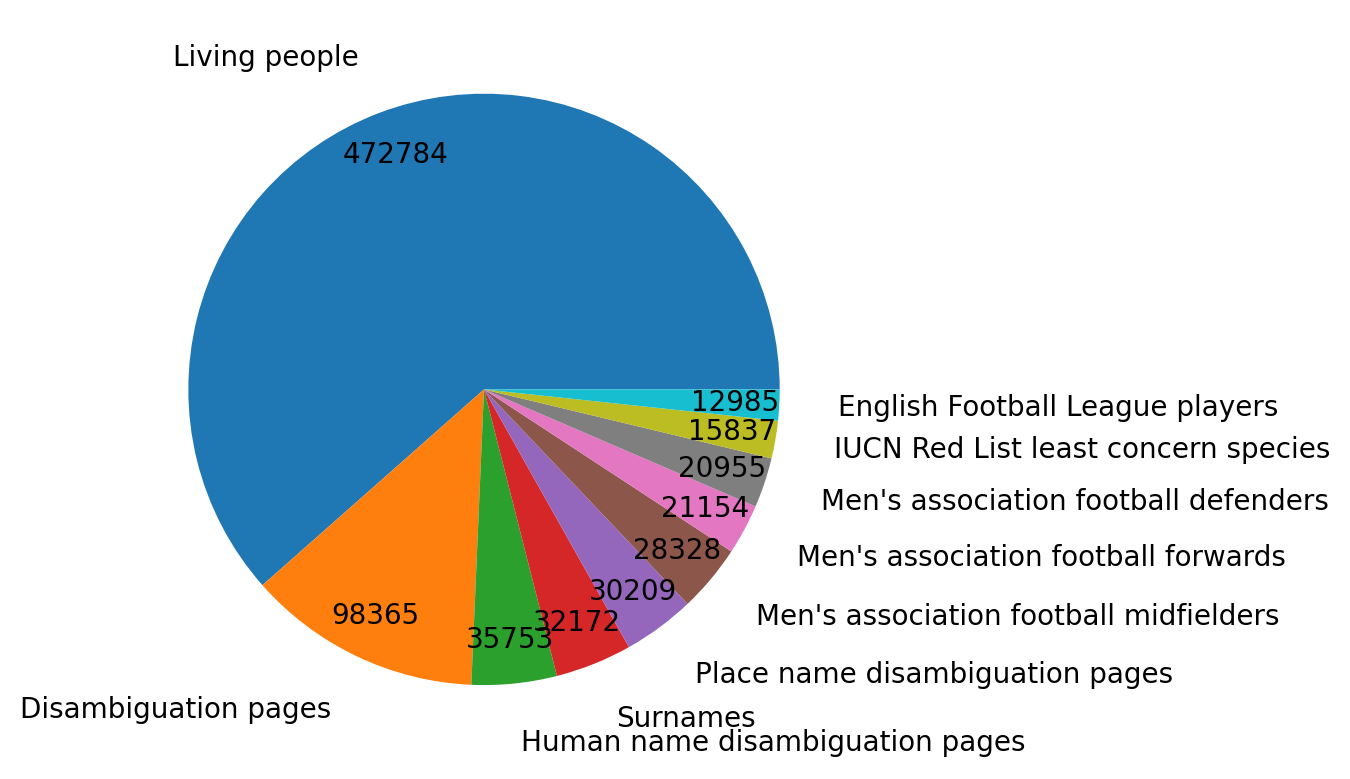

In [5]:
slice_of_counter = dict(list(sorted_counter.items())[:10])
labels = [v.replace("Category:", "") for v in list(slice_of_counter)]
values = [ slice_of_counter[k] for k in list(slice_of_counter)]
plt.pie(values, labels=labels, autopct = lambda x: str(int(x / 100 * sum(values))), pctdistance = 0.85, labeldistance = 1.2)

In [5]:
len(sorted_counter)

1389365

In [9]:
def get_key_substring(dictionary, subkey):
    return {key: value for key, value in dictionary.items() if subkey.lower() in key.lower()}

In [10]:
get_key_substring(sorted_counter, "attacks")

{'Category:Cryptographic attacks': 53,
 'Category:Terrorist incidents involving knife attacks': 43,
 'Category:Aftermath of the September 11 attacks': 42,
 'Category:Films about shark attacks': 40,
 'Category:Cyberattacks': 39,
 'Category:People associated with the September 11 attacks': 39,
 'Category:Denial-of-service attacks': 36,
 'Category:Films based on the September 11 attacks': 32,
 'Category:Survivors of terrorist attacks': 28,
 'Category:Music about the September 11 attacks': 23,
 'Category:Memorials for the September 11 attacks': 22,
 'Category:Terrorist attacks on airports': 22,
 'Category:Attacks on civilians attributed to the Liberation Tigers of Tamil Eelam': 21,
 'Category:Documentary films about the September 11 attacks': 21,
 'Category:Attacks on buildings and structures in 2021': 21,
 'Category:21st-century attacks on synagogues and Jewish communal organizations': 21,
 'Category:September 11 attacks': 21,
 'Category:Attacks on legislatures': 20,
 'Category:Stabbing a

In [11]:
categories = {
    "actors": ["actors", "actresses"],
    "animals": ["animals", "birds", "fauna", "fish", "insects", "mammals", "molluscs", "reptiles"],
    "art": ["paintings", "sculptures"],
    "books": ["books"],
    "films": ["american films"],
    "finance": ["finance"],
    "food": ["cuisine", "dish", "food"],
    "geography": ["cities", "countries", "tourist attractions"],
    "industry": ["industry"],
    "music": ["albums", "songs"],
    "plants": ["flora", "flowers", "plants", "vegetables"],
    "politics": ["politics"],
    "science": ["chemistry", "computer science", "mathematical", "physical", "physics"],
    "singers": ["singers"],
    "sports": ["sport", "sports", "sporting"],
    "video games": ["video games"],
    "war": ["attacks", "battles", "war"],
    "writers": ["writer"],
    "politicians": ["politicians"],
    "events": ["events"],
}

In [12]:
def regroup_categories(categories, classifier, counter):
    regrouped_classifier = {}
    unique_constraint = set()
    for k, v in categories.items():
        regrouped_classifier[k] = set()
        for search_keyword in v:
            for cat in get_key_substring(counter, search_keyword):
                for article, shard in classifier[cat]:
                    if not(article in unique_constraint):
                        regrouped_classifier[k].add((article, shard))
                        unique_constraint.add(article)
    print(len(unique_constraint))
    return regrouped_classifier

def count_categories(classifier):
    counter = {}
    for k, v in classifier.items():
        counter[k] = len(v)
    return counter

In [13]:
regrouped_classifier = regroup_categories(categories, category_classifier, sorted_counter)

1052980


In [23]:
counts = count_categories(regrouped_classifier)
counts

{'actors': 51731,
 'animals': 61886,
 'art': 7291,
 'books': 26331,
 'films': 24817,
 'finance': 4073,
 'food': 34676,
 'geography': 44068,
 'industry': 5435,
 'music': 103076,
 'plants': 28554,
 'politics': 17389,
 'science': 12909,
 'singers': 19930,
 'sports': 276538,
 'video games': 12271,
 'war': 163603,
 'writers': 68338,
 'politicians': 65859,
 'events': 24205}

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'actors'),
  Text(1, 0, 'animals'),
  Text(2, 0, 'art'),
  Text(3, 0, 'books'),
  Text(4, 0, 'films'),
  Text(5, 0, 'finance'),
  Text(6, 0, 'food'),
  Text(7, 0, 'geography'),
  Text(8, 0, 'industry'),
  Text(9, 0, 'music'),
  Text(10, 0, 'plants'),
  Text(11, 0, 'politics'),
  Text(12, 0, 'science'),
  Text(13, 0, 'singers'),
  Text(14, 0, 'sports'),
  Text(15, 0, 'video games'),
  Text(16, 0, 'war'),
  Text(17, 0, 'writers'),
  Text(18, 0, 'politicians'),
  Text(19, 0, 'events')])

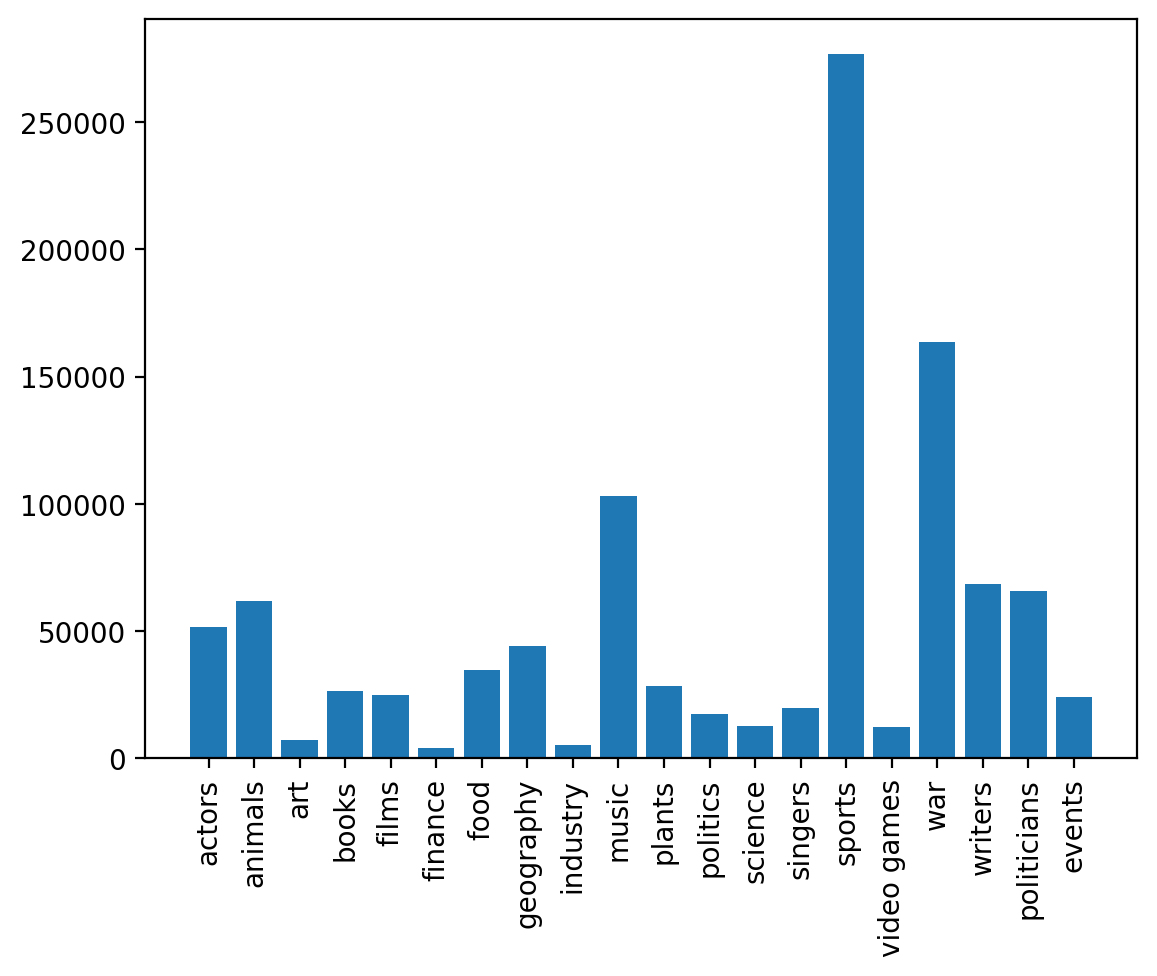

In [32]:
plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()))
plt.xticks(rotation=90)

In [15]:
regrouped_classifier["actors"]

{('4742100', 12),
 ('37249076', 1),
 ('727925', 2),
 ('76337', 31),
 ('1557073', 10),
 ('43800351', 8),
 ('51585035', 1),
 ('23308301', 1),
 ('25408193', 7),
 ('26187970', 1),
 ('63771997', 20),
 ('10195720', 13),
 ('49523910', 17),
 ('4750458', 1),
 ('3308169', 18),
 ('38455316', 1),
 ('32518472', 4),
 ('10981880', 5),
 ('39280651', 20),
 ('3149191', 8),
 ('691257', 18),
 ('37603614', 3),
 ('45667826', 19),
 ('51612742', 4),
 ('59555569', 11),
 ('4843824', 3),
 ('32942194', 24),
 ('51371489', 18),
 ('1325119', 12),
 ('65676334', 9),
 ('36994124', 4),
 ('20424', 2),
 ('18823', 19),
 ('10359721', 12),
 ('23281742', 8),
 ('13465017', 21),
 ('650080', 28),
 ('43473423', 2),
 ('50426934', 10),
 ('4509671', 18),
 ('14799759', 1),
 ('18818234', 8),
 ('36823578', 4),
 ('18796162', 24),
 ('45327742', 6),
 ('10687704', 1),
 ('16824331', 7),
 ('1870638', 1),
 ('42959779', 28),
 ('17383985', 9),
 ('26339884', 6),
 ('60431571', 2),
 ('67703892', 2),
 ('64829137', 8),
 ('1124826', 1),
 ('18889399',

In [16]:
import random

def build_dataset(classifier, limit):
    dataset = {}
    for k, v in classifier.items():
        if len(v) <= limit:
            dataset[k] = v
        else:
            dataset[k] = list(random.sample(sorted(v), limit))
    return dataset

In [17]:
ds = build_dataset(regrouped_classifier, 10000)

In [33]:
counts = count_categories(ds)
counts

{'actors': 10000,
 'animals': 10000,
 'art': 7291,
 'books': 10000,
 'films': 10000,
 'finance': 4073,
 'food': 10000,
 'geography': 10000,
 'industry': 5435,
 'music': 10000,
 'plants': 10000,
 'politics': 10000,
 'science': 10000,
 'singers': 10000,
 'sports': 10000,
 'video games': 10000,
 'war': 10000,
 'writers': 10000,
 'politicians': 10000,
 'events': 10000}

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'actors'),
  Text(1, 0, 'animals'),
  Text(2, 0, 'art'),
  Text(3, 0, 'books'),
  Text(4, 0, 'films'),
  Text(5, 0, 'finance'),
  Text(6, 0, 'food'),
  Text(7, 0, 'geography'),
  Text(8, 0, 'industry'),
  Text(9, 0, 'music'),
  Text(10, 0, 'plants'),
  Text(11, 0, 'politics'),
  Text(12, 0, 'science'),
  Text(13, 0, 'singers'),
  Text(14, 0, 'sports'),
  Text(15, 0, 'video games'),
  Text(16, 0, 'war'),
  Text(17, 0, 'writers'),
  Text(18, 0, 'politicians'),
  Text(19, 0, 'events')])

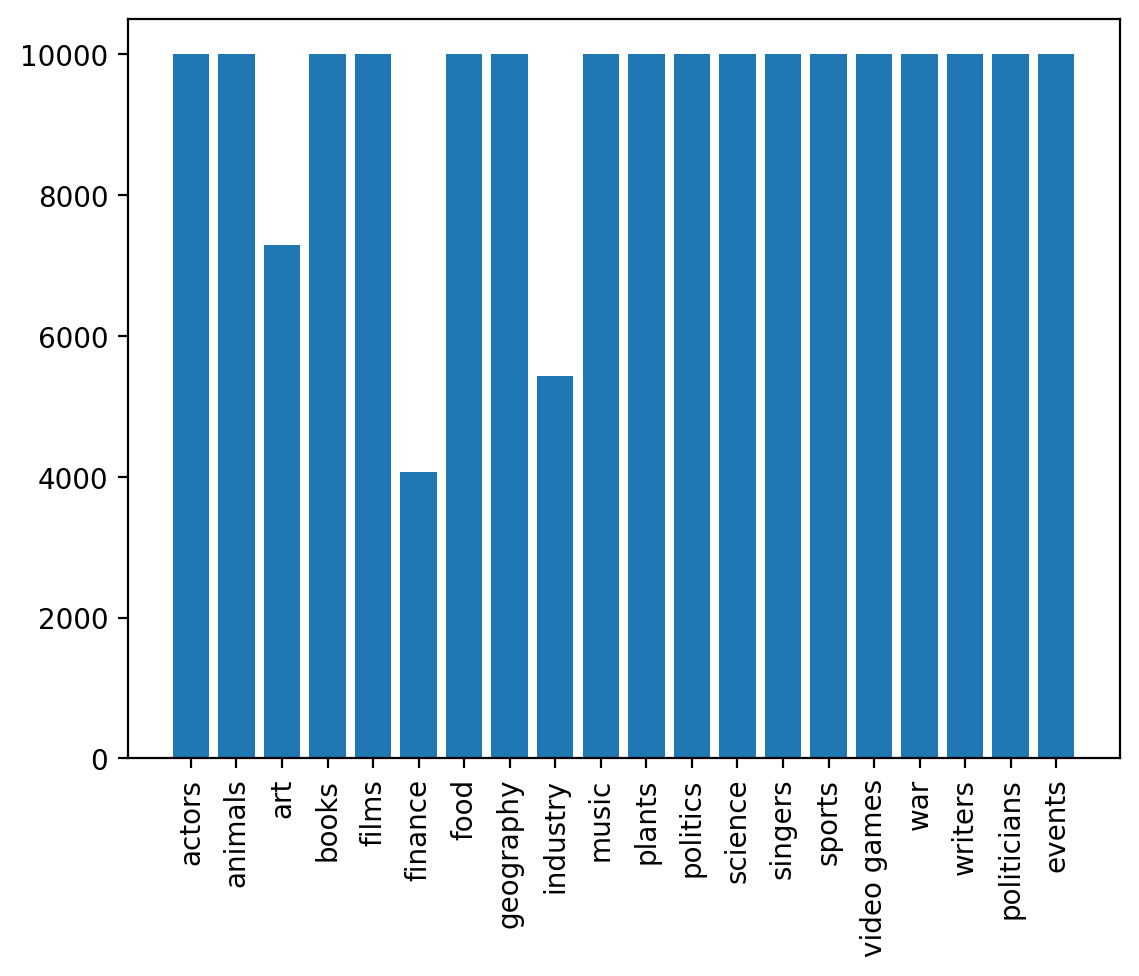

In [34]:
plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()))
plt.xticks(rotation=90)

In [21]:
class SetEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, set):
            return list(obj)
        return json.JSONEncoder.default(self, obj)

In [22]:
with open("categories_selection.json", "w") as f:
    json.dump(ds, f, cls=SetEncoder)